<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for immage classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [35]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import tensorflow
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [2]:
(X_train_all, t_train_all), (X_test_all, t_test_all) = cifar10.load_data()

In [3]:
# take a small sample of data
size = 50000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]
X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]

In [4]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [5]:
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [6]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

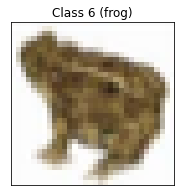

In [7]:
check_one(X_train, t_train.flatten())

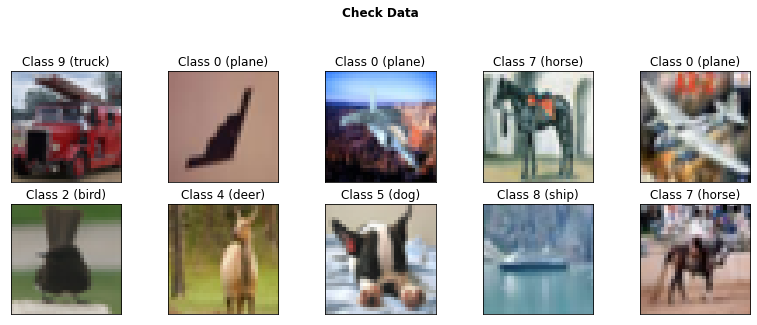

In [8]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [9]:
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

In [10]:
t_train[0]

array([6], dtype=uint8)

In [11]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [12]:
model = Sequential()

2022-10-01 16:56:33.707571: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        1344      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 48)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 96)        41568     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 96)        83040     
                                                        

## Compile the model

In [15]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit the training data

In [16]:
tensorboard = TensorBoard(log_dir = 'logs')

In [17]:
%%time
# Fit the model on a training set
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    # epochs = 100,
    epochs = 100,
    # batch_size = 100,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 0)
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')

Training accuracy:0.79 validation accuracy:0.78 
CPU times: user 16h 22min, sys: 3h 7min 11s, total: 19h 29min 11s
Wall time: 3h 38min 2s


In [18]:
%load_ext tensorboard
%tensorboard --logdir logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/Users/macbook/opt/anaconda3/envs/Deep/bin/tensorboard", line 6, in <module>
    from tensorboard.main import run_main
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/main.py", line 27, in <module>
    from tensorboard import default
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/default.py", line 33, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/plugins/audio/audio_plugin.py", line 23, in <module>
    from tensorboard import plugin_util
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/plugin_util.py", line 78, in <module>
    _MARKDOWN_STORE = _MarkdownStore()
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/plug

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [19]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/Users/macbook/opt/anaconda3/envs/Deep/bin/tensorboard", line 6, in <module>
    from tensorboard.main import run_main
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/main.py", line 27, in <module>
    from tensorboard import default
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/default.py", line 33, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/plugins/audio/audio_plugin.py", line 23, in <module>
    from tensorboard import plugin_util
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/plugin_util.py", line 78, in <module>
    _MARKDOWN_STORE = _MarkdownStore()
  File "/Users/macbook/opt/anaconda3/envs/Deep/lib/python3.8/site-packages/tensorboard/plug

## Create predictions

In [36]:
%%time
predictions = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [29]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [21]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [22]:
print(predict_x)

[[2.85673275e-04 7.16066861e-05 3.19154514e-03 ... 2.23302026e-03
  2.99158448e-04 5.25163079e-04]
 [2.09764135e-03 3.45618539e-02 1.05653766e-04 ... 2.01172838e-08
  9.61379588e-01 1.71369151e-03]
 [4.37237322e-02 2.84417532e-02 6.18112413e-03 ... 1.66486658e-04
  8.91359925e-01 2.17661802e-02]
 ...
 [5.63673495e-07 8.74460615e-10 8.40917404e-04 ... 4.11222027e-05
  2.56370161e-08 1.58666129e-08]
 [1.55738996e-06 9.99483466e-01 1.24339849e-07 ... 1.05207953e-10
  1.19739707e-06 5.13637206e-04]
 [3.22018472e-20 2.54032838e-29 3.53049092e-14 ... 1.00000000e+00
  4.03787737e-27 4.30320228e-20]]


In [23]:
print(classes_x)

[3 8 8 ... 5 1 7]


## Evaluate the model

In [24]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1000/1000 [==============================] - 8s 8ms/step - loss: 0.7578 - accuracy: 0.7759

Test loss: 0.757812, Test accuracy: 0.775900


## Visualisation of cost

In [25]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [38]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, classes_x)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 819   9  29  18  11   5   5   9  51  44 
  1|  10 862   0   6   2   2   2   2  11 103 
  2|  60   1 704  38  67  56  44  11  15   4 
  3|  26   3  67 561  73 149  53  28  15  25 
  4|   9   0  50  61 766  20  31  50   6   7 
  5|   7   4  66 141  39 673  12  37   7  14 
  6|   8   3  60  52  30  14 814   6   9   4 
  7|  13   3  37  41  57  45   2 788   3  11 
  8|  65  18   2  15   4   2   2   1 847  44 
  9|   9  26   1  10   3   0   3   6  17 925 


## Visualisation of cost

In [45]:
model.history

In [43]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7fa0df032700>>

KeyError: 'accuracy'

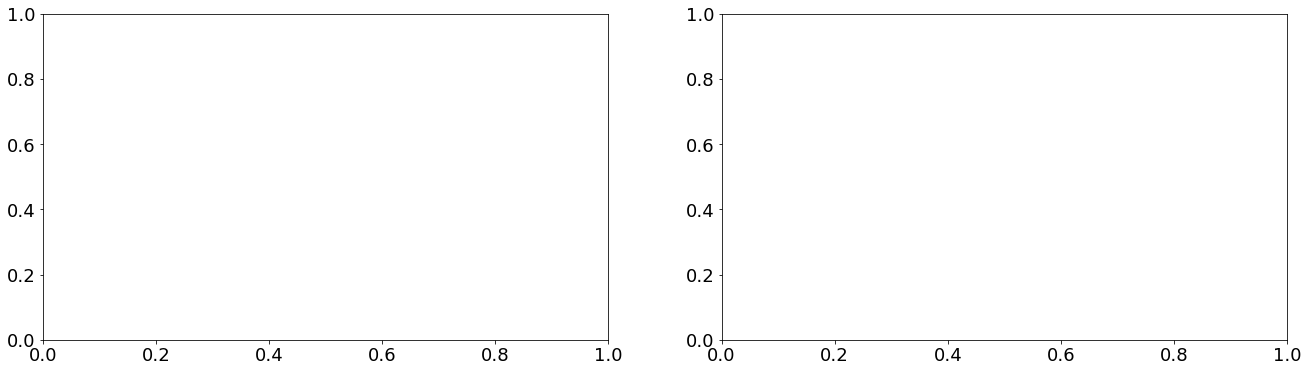

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history["accuracy"][-1])
ax[0].plot(model.history.history["val_accuracy"][-1])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'])
ax[1].plot(model.history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

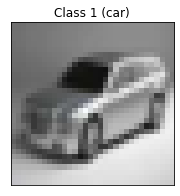

In [48]:
check_one(X_test, classes_x, actual = y_test, compare = True)

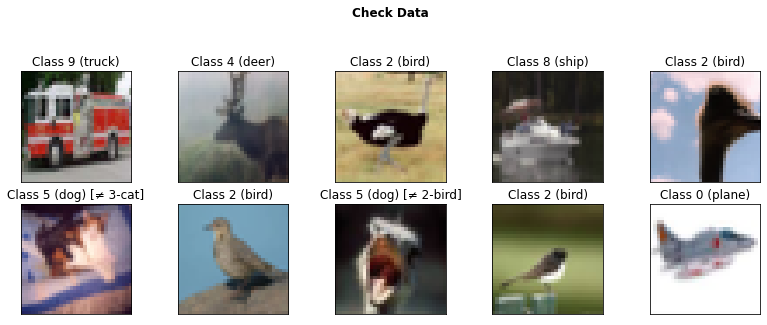

In [49]:
check_ten(X_test, classes_x, y_test, True)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



